<a href="https://colab.research.google.com/github/vismiroglou/mask_rcnn/blob/main/mask_rcnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mask R-CNN demo on PyTorch

### Get the full repository from github

In [12]:
!git clone https://github.com/vismiroglou/mask_rcnn

Cloning into 'mask_rcnn'...
remote: Enumerating objects: 38, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 38 (delta 8), reused 32 (delta 5), pack-reused 0 (from 0)
Receiving objects: 100% (38/38), 17.56 MiB | 24.87 MiB/s, done.
Resolving deltas: 100% (8/8), done.


In [13]:
%cd /content/mask_rcnn

/content/mask_rcnn


### Import required packages

In [14]:
import os
import random
from glob import glob

import cv2
import numpy as np
from pycocotools.coco import COCO

import torch
from torchvision.models.detection import maskrcnn_resnet50_fpn

from visualize import display_instances
from utils import load_image_for_model

### Load a pre-trained Mask R-CNN directly from torchvision

In [15]:
# Load the model
model = maskrcnn_resnet50_fpn(weights='COCO_V1', box_score_thresh=0.5)
model.eval()

MaskRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(in

### Load images and class labels

In [16]:
# Get image paths
images = glob(os.path.join('data', 'images', '*.jpg'))
# Annotations for available images
coco = COCO("data/annotations.json")

print('\nCOCO Categories:\n')
for cat in coco.loadCats(coco.getCatIds()):
    print(cat['name'])

loading annotations into memory...
Done (t=0.02s)
creating index...
index created!

COCO Categories:

person
bicycle
car
motorcycle
airplane
bus
train
truck
boat
traffic light
fire hydrant
stop sign
parking meter
bench
bird
cat
dog
horse
sheep
cow
elephant
bear
zebra
giraffe
backpack
umbrella
handbag
tie
suitcase
frisbee
skis
snowboard
sports ball
kite
baseball bat
baseball glove
skateboard
surfboard
tennis racket
bottle
wine glass
cup
fork
knife
spoon
bowl
banana
apple
sandwich
orange
broccoli
carrot
hot dog
pizza
donut
cake
chair
couch
potted plant
bed
dining table
toilet
tv
laptop
mouse
remote
keyboard
cell phone
microwave
oven
toaster
sink
refrigerator
book
clock
vase
scissors
teddy bear
hair drier
toothbrush


### Use the model on a random image

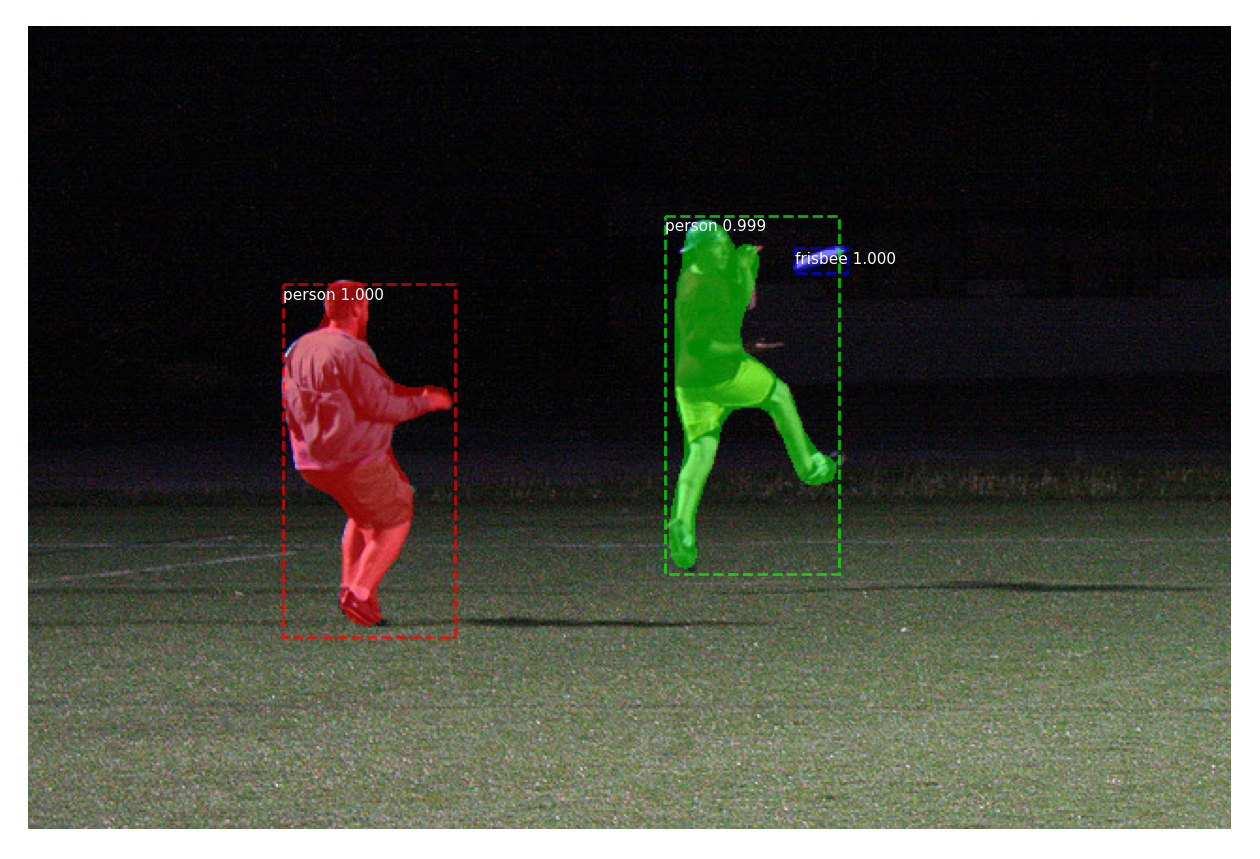

In [17]:
# Get a random image
img_model, img_org = load_image_for_model(random.choice(images))

with torch.no_grad():
    results = model(img_model)
    r = results[0]
    display_instances(img_org, r['boxes'], r['masks'], r['labels'], coco, r['scores'])

Saving b7e.jpg to b7e (1).jpg


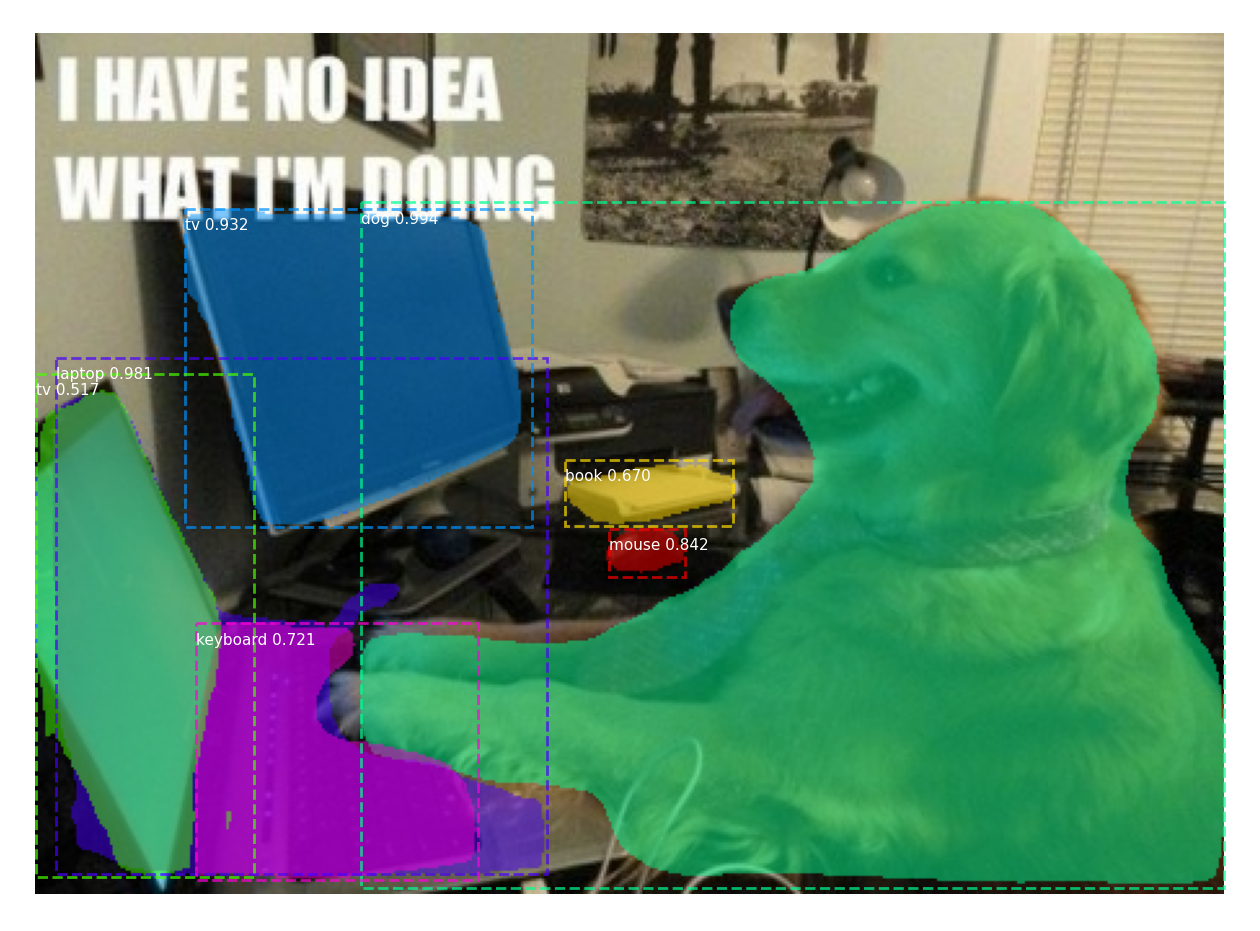

In [18]:
from google.colab import files
uploads = files.upload()

for upload in uploads.keys():
  img_model, img_org = load_image_for_model(upload)

with torch.no_grad():
  results = model(img_model)
  r = results[0]
  display_instances(img_org, r['boxes'], r['masks'], r['labels'], coco, r['scores'])